In [1]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras # keras is a wrapper on tensorflow

import os
import cv2
import matplotlib.pyplot as plt

#mnist = pd.read_csv('MNIST_Train.csv')

In [2]:
path1 = r'E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder'
cate = ['dogs', 'cats']

In [3]:
# for i in cate:
#     folders = os.path.join(path1,i)
#     print(folders)

In [4]:

for i in cate:
    folders = os.path.join(path1,i)
    print(folders)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        print(image_path)

E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4001.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4002.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4003.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4004.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4005.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4006.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4007.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4008.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4009.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4010.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4011.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs\dog.4012.jpg

E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4001.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4002.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4003.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4004.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4005.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4006.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4007.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4008.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4009.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4010.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4011.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats\cat.4012.jpg
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats

E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\dogs
(499, 421, 3)
E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder\cats
(415, 498, 3)


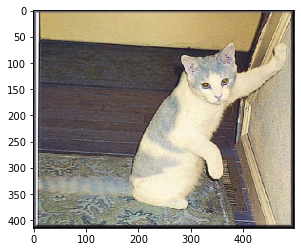

In [5]:
for i in cate:
    folders = os.path.join(path1,i)
    print(folders)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path) # using the cv2 i m read and storing in variable image_array
        plt.imshow(image_array)
        print(image_array.shape)
        break
        

In [6]:
image_size = 200  
                 
path1 = r'E:\Data Science\DataSets and EDA\Deep Learning\CatDogFolder'
cate = ['cats','dogs']
    
input_image = []   

for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)   # we need to tell software which image is of cat and which is of dog
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path) #  using the cv2 i am reading the image and storing in variable image_array
        image_array =cv2.resize(image_array , (image_size  , image_size) ) # resizing each image to 50 * 50
        input_image.append([image_array , label])


In [7]:
# When we built model on we need to shuffle the images and then do the random sampling

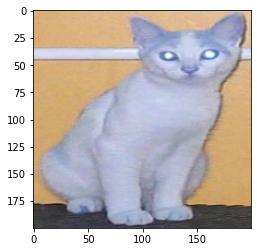

In [22]:
import numpy as np

np.random.shuffle(input_image)

X = []
Y = []

for x_val, labels in input_image:
    X.append(x_val)
    Y.append(labels)
    
X = np.array(X)
Y = np.array(Y)

X = X/255

plt.imshow(X[0])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [26]:
print(X_train.shape)
print(Y_train.shape)
X.shape
Y

(1618, 200, 200, 3)
(1618,)


array([0, 1, 1, ..., 1, 1, 1])

In [1]:
model = Sequential() # modelis initialized
model.add(Conv2D(filters = 30, kernel_size = (5, 5), activation= 'relu',)) # Input/convolution layer Info, filters(sliders/kernels)
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Flatten())

model.add(Dense(128, activation= 'relu', input_shape = X.shape[1:])) # Hidden Layer
# model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# adam = tf.keras.optimizers.Adam(lr = 0.01) # its not mandatory default is 0.001

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
 # 10 is not a hyper parameter
# number of layers in target variable

NameError: name 'Sequential' is not defined

In [43]:
model.fit(X_train, Y_train, batch_size= 64, epochs=3, validation_split=.2)

Epoch 1/3
21/21 [==============================] - 34s 1s/step - loss: 6.2245 - accuracy: 0.4992 - val_loss: 0.7148 - val_accuracy: 0.5247
Epoch 2/3
21/21 [==============================] - 33s 2s/step - loss: 0.6894 - accuracy: 0.5464 - val_loss: 0.6905 - val_accuracy: 0.5216
Epoch 3/3
21/21 [==============================] - 32s 2s/step - loss: 0.6539 - accuracy: 0.6306 - val_loss: 0.6912 - val_accuracy: 0.5864


In [45]:
pred = model.predict(X_test)

pred = np.argmax(pred, axis=1)

from sklearn.metrics import confusion_matrix

tab = confusion_matrix(Y_test, pred)
tab

array([[148,  72],
       [ 96,  89]], dtype=int64)